# Project Overview: Machine Learning for Predicting Unit Price of Imported Goods
## Author: Paul Sentongo

## Introduction
The objective of this project is to detect undervaluation and overvaluation of imported goods by predicting the unit price of a given commodity in local currency. This is critical for ensuring fair trade practices and accurate taxation. This project involves several stages including data preparation, exploratory data analysis, feature engineering, model building, evaluation, and deployment.

## Key Steps
1. **Data Collection and Preparation**
   - Load the dataset and understand its structure.
   - Clean and preprocess the data.
   - Handle missing values and detect outliers.
   
2. **Exploratory Data Analysis (EDA)**
   - Conduct descriptive statistics to understand data distribution.
   - Visualize data to identify patterns and relationships.

3. **Feature Engineering**
   - Create new features that may enhance model performance.
   - Normalize or scale features if necessary.

4. **Model Building**
   - Select appropriate machine learning algorithms.
   - Train and validate models using cross-validation.
   
5. **Model Evaluation**
   - Evaluate models using relevant metrics.
   - Select the best-performing model based on evaluation results.

6. **Model Deployment**
   - Preparing the final model for deployment.
   - Deploying the model using a suitable platform (e.g., Streamlit, Flask for web deployment).

7. **Monitoring and Maintenance**
   - Monitor model performance in production.
   - Update the model as necessary based on new data and feedback.

## Tools and Technologies
- **Programming Language:** Python
- **Libraries:** Pandas, NumPy, Scikit-learn, Matplotlib, Seaborn, Flask
- **Deployment Platform:** Streamlit, Flask, Docker

This approach ensures a robust solution for detecting pricing discrepancies in imported goods, thereby aiding in regulatory compliance and economic fairness.

## Import necessary libraries

In [1]:
# importing libraries to be used in the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## Variables description

In [2]:
from tabulate import tabulate

# Defining attributes and their descriptions
attributes = [
    ["Date", "Date of import record"],
    ["HS_Code", "Harmonized system commodity code (HS code)"],
    ["Item_Description", "Description of the imported item"],
    ["Country_of_Origin", "Country from which the goods originated"],
    ["Port_of_Shipment", "Port through which the goods entered Uganda"],
    ["Quantity", "Quantity of goods imported"],
    ["Quantity_Unit", "Unit of measurement for the quantity (e.g., units, boxes, liters)"],
    ["Net_Mass_kg", "Net mass (excluding packaging)"],
    ["Gross_Mass_kg", "Gross mass (including packaging)"],
    ["FOB_Value_USD", "Free on Board value in USD (excluding freight and insurance)"],
    ["Freight_USD", "Freight cost in USD"],
    ["Insurance_USD", "Insurance cost in USD"],
    ["CIF_Value_USD", "CIF (Cost, Insurance, and Freight) value in USD"],
    ["CIF_Value_UGX", "CIF value in local currency (UGX)"],
    ["Unit_Price_Actual_UGX", "Actual unit price in local currency (UGX)"],
    ["Unit_Price_Predicted_UGX", "Predicted unit price in local currency (UGX)"],
    ["Tax_Rate", "Import duty rate as a percentage"],
    ["Currency_Code", "Currency code for original values (e.g., USD)"],
    ["Mode_of_Transport", "Mode of transport used (Land, Air, or Water)"],
    ["Unit_Price_Calculated_UGX", "Unit price in local currency including all duties and taxes"]
]

# Creating markdown table
markdown_table = tabulate(attributes, headers=["Attribute", "Description"], tablefmt="github")

print(markdown_table)


| Attribute                 | Description                                                       |
|---------------------------|-------------------------------------------------------------------|
| Date                      | Date of import record                                             |
| HS_Code                   | Harmonized system commodity code (HS code)                        |
| Item_Description          | Description of the imported item                                  |
| Country_of_Origin         | Country from which the goods originated                           |
| Port_of_Shipment          | Port through which the goods entered Uganda                       |
| Quantity                  | Quantity of goods imported                                        |
| Quantity_Unit             | Unit of measurement for the quantity (e.g., units, boxes, liters) |
| Net_Mass_kg               | Net mass (excluding packaging)                                    |
| Gross_Mass_kg     

In [3]:
# Loading the dataset
data = pd.read_csv('uganda_imports_trade_data_train_set.csv')

In [4]:
data.head(5)

,Date,HS_Code,Item_Description,Country_of_Origin,Port_of_Shipment,Quantity,Quantity_Unit,Net_Mass_kg,Gross_Mass_kg,FOB_Value_USD,Freight_USD,Insurance_USD,CIF_Value_USD,CIF_Value_UGX,Unit_Price_UGX,Tax_Rate,Currency_Code,Mode_of_Transport
0,23/04/2021,27101931,Mineral fuels and oils,Saudi Arabia,Busia,23.58,units,114.15,123.56,9044.66,1050.60,143.72,10238.98,37439216.34,1587753.03,0.05,USD,Land
1,03/11/2021,30049099,Generic pharmaceutical products,China,Port Bell,482.42,kg,2253.97,2439.86,2352.84,220.04,47.01,2619.89,9671924.57,20048.76,0.18,USD,Water
2,13/11/2022,30049099,Generic pharmaceutical products,China,Entebbe Airport,131.97,liters,348.67,377.42,2084.10,169.47,17.04,2270.61,8412978.38,63749.17,0.18,USD,Air
3,13/03/2022,15079090,Vegetable fats and oils,Germany,Entebbe Airport,113.44,pairs,449.93,487.04,2759.84,151.30,53.46,2964.60,10672562.76,94081.12,0.15,USD,Air
4,04/06/2020,12010090,Soybeans,China,Port Bell,44.42,units,210.32,227.66,9861.95,1345.54,62.96,11270.45,41822493.34,941523.94,0.05,USD,Water


In [5]:
#checking the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               80000 non-null  object 
 1   HS_Code            80000 non-null  int64  
 2   Item_Description   80000 non-null  object 
 3   Country_of_Origin  80000 non-null  object 
 4   Port_of_Shipment   80000 non-null  object 
 5   Quantity           80000 non-null  float64
 6   Quantity_Unit      80000 non-null  object 
 7   Net_Mass_kg        80000 non-null  float64
 8   Gross_Mass_kg      80000 non-null  float64
 9   FOB_Value_USD      80000 non-null  float64
 10  Freight_USD        80000 non-null  float64
 11  Insurance_USD      80000 non-null  float64
 12  CIF_Value_USD      80000 non-null  float64
 13  CIF_Value_UGX      80000 non-null  float64
 14  Unit_Price_UGX     80000 non-null  float64
 15  Tax_Rate           80000 non-null  float64
 16  Currency_Code      800

In [6]:
# checking for shape of the dataset
data.shape

(80000, 18)

### DATA SANITY CHECK

In [7]:
#checking for missing values in the dataset
data.isnull().sum()

Date                 0
HS_Code              0
Item_Description     0
Country_of_Origin    0
Port_of_Shipment     0
Quantity             0
Quantity_Unit        0
Net_Mass_kg          0
Gross_Mass_kg        0
FOB_Value_USD        0
Freight_USD          0
Insurance_USD        0
CIF_Value_USD        0
CIF_Value_UGX        0
Unit_Price_UGX       0
Tax_Rate             0
Currency_Code        0
Mode_of_Transport    0
dtype: int64

In [8]:
#checking for duplicate values in the dataset
data.duplicated().sum()

0

In [9]:
#converting the 'Date' column to datetime format and extracting year and month
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

In [10]:
data.head()

,Date,HS_Code,Item_Description,Country_of_Origin,Port_of_Shipment,Quantity,Quantity_Unit,Net_Mass_kg,Gross_Mass_kg,FOB_Value_USD,Freight_USD,Insurance_USD,CIF_Value_USD,CIF_Value_UGX,Unit_Price_UGX,Tax_Rate,Currency_Code,Mode_of_Transport,Year,Month
0,2021-04-23,27101931,Mineral fuels and oils,Saudi Arabia,Busia,23.58,units,114.15,123.56,9044.66,1050.60,143.72,10238.98,37439216.34,1587753.03,0.05,USD,Land,2021,4
1,2021-11-03,30049099,Generic pharmaceutical products,China,Port Bell,482.42,kg,2253.97,2439.86,2352.84,220.04,47.01,2619.89,9671924.57,20048.76,0.18,USD,Water,2021,11
2,2022-11-13,30049099,Generic pharmaceutical products,China,Entebbe Airport,131.97,liters,348.67,377.42,2084.10,169.47,17.04,2270.61,8412978.38,63749.17,0.18,USD,Air,2022,11
3,2022-03-13,15079090,Vegetable fats and oils,Germany,Entebbe Airport,113.44,pairs,449.93,487.04,2759.84,151.30,53.46,2964.60,10672562.76,94081.12,0.15,USD,Air,2022,3
4,2020-06-04,12010090,Soybeans,China,Port Bell,44.42,units,210.32,227.66,9861.95,1345.54,62.96,11270.45,41822493.34,941523.94,0.05,USD,Water,2020,6


## DATA VISUALIZATION

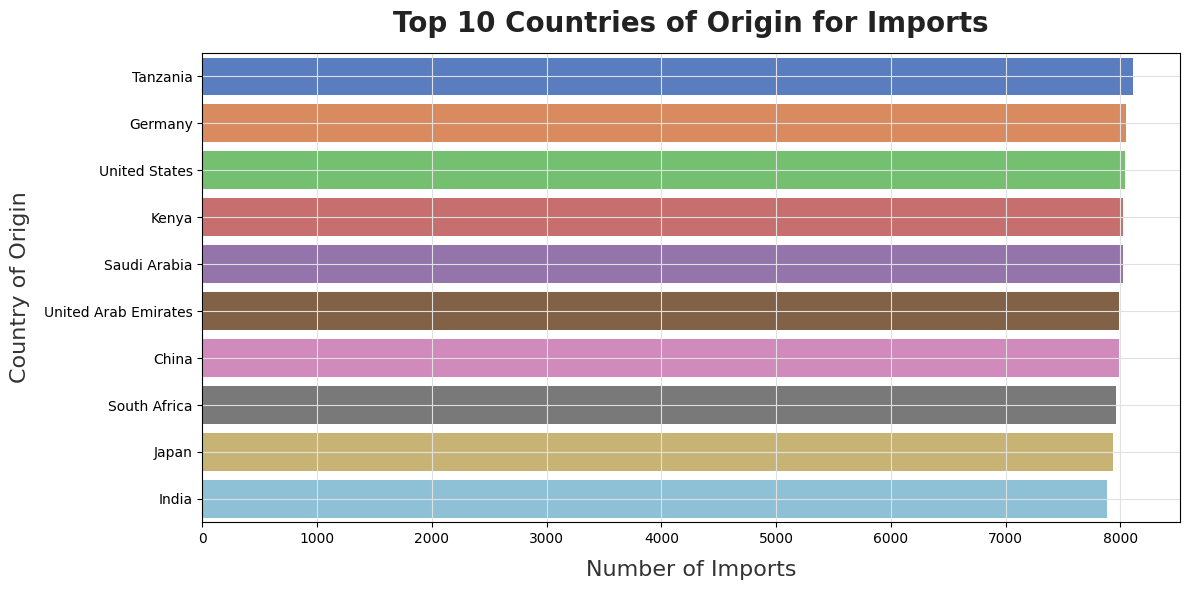

In [11]:
# Analyzing the top countries of origin for imports
country_counts = data['Country_of_Origin'].value_counts().head(10)  # Get top 10 countries

# Creating a bar plot for the top countries of origin
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='muted')
plt.title('Top 10 Countries of Origin for Imports', fontsize=20, fontweight='semibold', color='#222222', pad=15)
plt.xlabel('Number of Imports', fontsize=16, color='#333333', labelpad=10)
plt.ylabel('Country of Origin', fontsize=16, color='#333333', labelpad=10)
plt.grid(color='#E0E0E0')
plt.tight_layout()
plt.show()

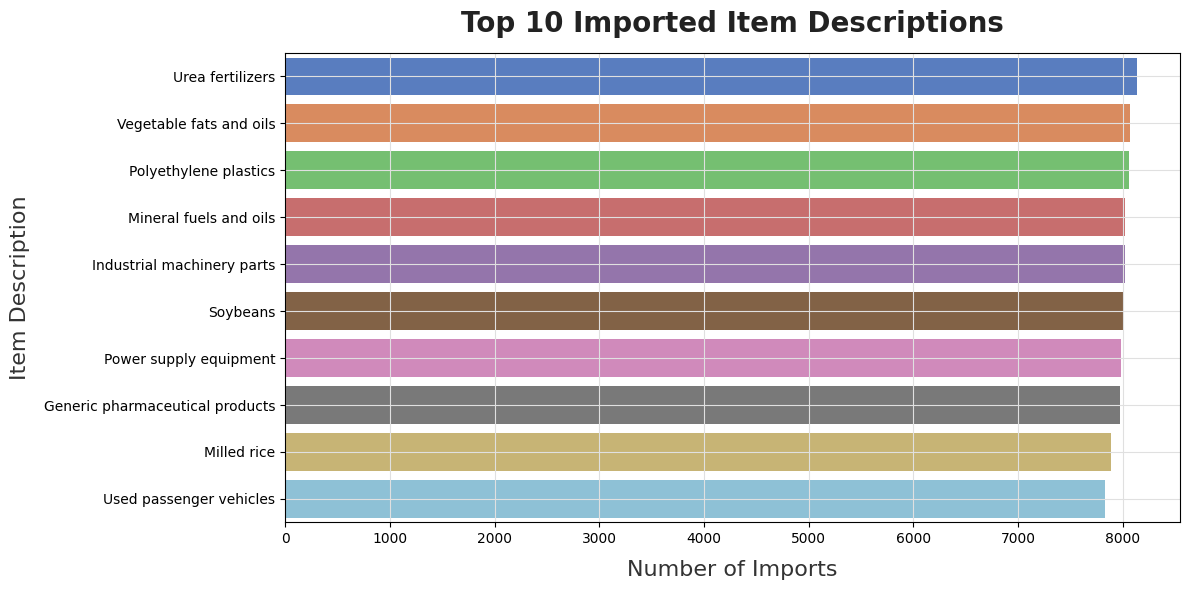

In [12]:
# Counting the occurrences of each item description
item_counts = data['Item_Description'].value_counts().head(10)  # Get top 10 item descriptions

# Creating a bar plot for the top item descriptions
plt.figure(figsize=(12, 6))
sns.barplot(x=item_counts.values, y=item_counts.index, palette='muted')
plt.title('Top 10 Imported Item Descriptions', fontsize=20, fontweight='semibold', color='#222222', pad=15)
plt.xlabel('Number of Imports', fontsize=16, color='#333333', labelpad=10)
plt.ylabel('Item Description', fontsize=16, color='#333333', labelpad=10)
plt.grid(color='#E0E0E0')
plt.tight_layout()
plt.show()

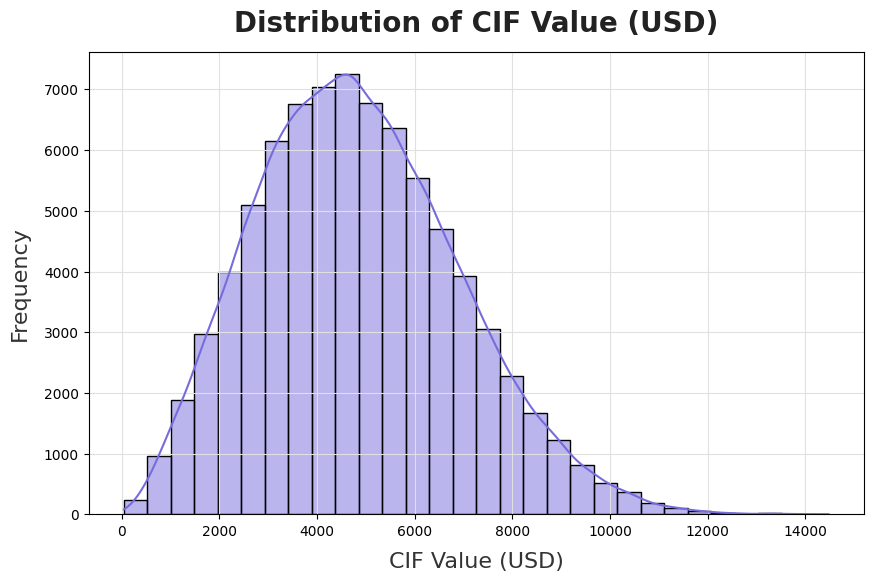

In [13]:
# Visualizing the distribution of CIF_Value_USD
plt.figure(figsize=(10, 6))
sns.histplot(data['CIF_Value_USD'], bins=30, kde=True, color='#766CDB')
plt.title('Distribution of CIF Value (USD)', fontsize=20, fontweight='semibold', color='#222222', pad=15)
plt.xlabel('CIF Value (USD)', fontsize=16, color='#333333', labelpad=10)
plt.ylabel('Frequency', fontsize=16, color='#333333', labelpad=10)
plt.grid(color='#E0E0E0')
plt.show()

In [14]:
# Grouping the data by month and summing the CIF_Value_USD to analyze trends over time
monthly_trends = data.resample('M', on='Date').sum()['CIF_Value_USD']

# Displaying the first few rows of the monthly trends
monthly_trends_head = monthly_trends.head()  
monthly_trends_head

Date
2020-01-31    6649546.28
2020-02-29    6103505.75
2020-03-31    6754546.46
2020-04-30    6173703.13
2020-05-31    6389595.21
Freq: ME, Name: CIF_Value_USD, dtype: float64

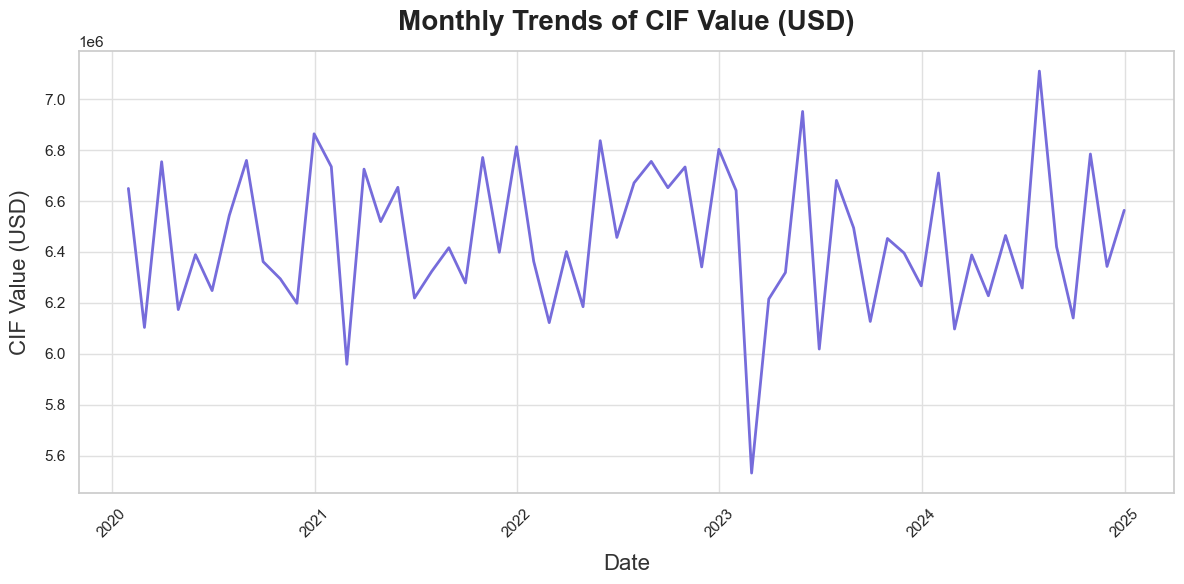

In [15]:
# Setting the style for the plots
sns.set(style='whitegrid')

# Plotting the monthly trends of CIF_Value_USD
plt.figure(figsize=(12, 6))
plt.plot(monthly_trends.index, monthly_trends.values, color='#766CDB', linewidth=2)
plt.title('Monthly Trends of CIF Value (USD)', fontsize=20, fontweight='semibold', color='#222222', pad=15)
plt.xlabel('Date', fontsize=16, color='#333333', labelpad=10)
plt.ylabel('CIF Value (USD)', fontsize=16, color='#333333', labelpad=10)
plt.xticks(rotation=45)
plt.grid(color='#E0E0E0')
plt.tight_layout()
plt.show()

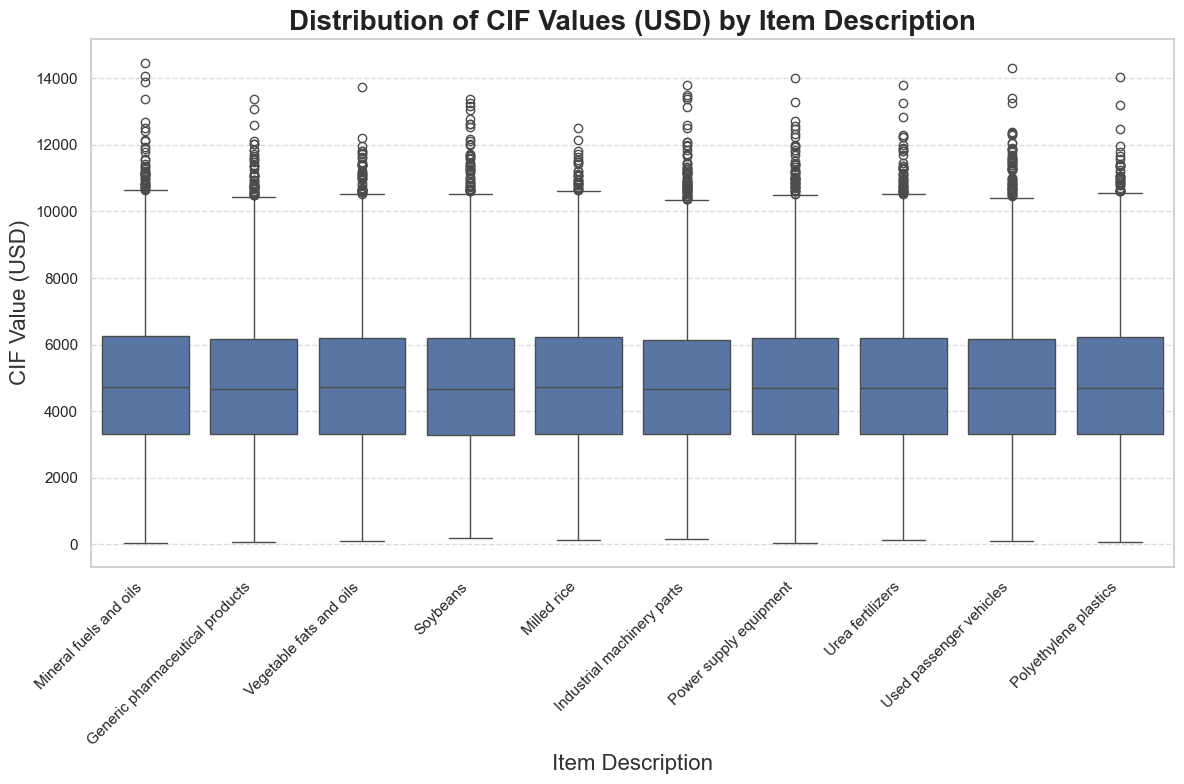

In [16]:
# Creating box plots to visualize the distribution of CIF values across different item categories
# This assumes 'Item_Description' is the categorical variable for item categories
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='Item_Description', y='CIF_Value_USD')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of CIF Values (USD) by Item Description', fontsize=20, fontweight='semibold', color='#222222')
plt.xlabel('Item Description', fontsize=16, fontweight='medium', color='#333333')
plt.ylabel('CIF Value (USD)', fontsize=16, fontweight='medium', color='#333333')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [17]:
data.drop(columns=['Date'], inplace=True)

### OUTLIERS DETECTION AND TREATMENT

In [18]:
# Drop the date column
data.describe()

,HS_Code,Quantity,Net_Mass_kg,Gross_Mass_kg,FOB_Value_USD,Freight_USD,Insurance_USD,CIF_Value_USD,CIF_Value_UGX,Unit_Price_UGX,Tax_Rate,Year,Month
count,8.000000e+04,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,8.000000e+04,8.000000e+04,80000.000000,80000.000000,80000.000000
mean,4.194956e+07,454.967817,1145.639541,1240.125318,4446.384545,343.395855,48.821013,4838.601413,1.790144e+07,3.663977e+05,0.155091,2021.996025,6.535362
std,2.956936e+07,1232.689205,3491.679035,3779.652544,1897.497696,249.933349,32.598224,2075.077554,7.698696e+06,1.118717e+06,0.065483,1.412731,3.450366
min,1.006301e+07,0.180000,0.230000,0.250000,43.470000,1.770000,0.250000,49.930000,1.853126e+05,6.220000e+01,0.050000,2020.000000,1.000000
25%,1.507909e+07,54.400000,100.187500,108.447500,3051.947500,143.680000,22.930000,3315.825000,1.226347e+07,3.702210e+04,0.100000,2021.000000,4.000000
50%,3.102100e+07,149.070000,310.570000,336.190000,4326.305000,291.315000,42.030000,4699.915000,1.736994e+07,1.089411e+05,0.150000,2022.000000,7.000000
75%,8.408901e+07,408.042500,948.230000,1026.440000,5704.207500,490.662500,68.010000,6202.357500,2.294267e+07,3.139336e+05,0.200000,2023.000000,10.000000
max,8.703232e+07,74745.370000,242479.670000,262477.990000,13438.990000,1808.290000,229.530000,14471.070000,5.616450e+07,9.730783e+07,0.250000,2024.000000,12.000000


In [19]:
# Detect outliers using the IQR method for all numeric columns
numeric_columns = data.select_dtypes(include=['float64']).columns

outliers_summary = {}

for column in numeric_columns:
    Q1 = data[column].quantile(0.25)  # 25th percentile
    Q3 = data[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range

    # Calculate bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    # Save summary of outliers
    outliers_summary[column] = {
        "num_outliers": len(outliers),
        "lower_bound": lower_bound,
        "upper_bound": upper_bound
    }

    print(f"{column}: {len(outliers)} outliers detected.")
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}\n")

# Optional: Display the full summary of outliers for analysis
print("\nOutliers Summary:")
print(pd.DataFrame(outliers_summary).T)

Quantity: 8802 outliers detected.
Lower Bound: -476.06375000000014, Upper Bound: 938.5062500000001

Net_Mass_kg: 9215 outliers detected.
Lower Bound: -1171.87625, Upper Bound: 2220.29375

Gross_Mass_kg: 9215 outliers detected.
Lower Bound: -1268.54125, Upper Bound: 2403.42875

FOB_Value_USD: 425 outliers detected.
Lower Bound: -926.4424999999987, Upper Bound: 9682.597499999998

Freight_USD: 1242 outliers detected.
Lower Bound: -376.79375, Upper Bound: 1011.13625

Insurance_USD: 1259 outliers detected.
Lower Bound: -44.690000000000005, Upper Bound: 135.63

CIF_Value_USD: 464 outliers detected.
Lower Bound: -1013.9737500000001, Upper Bound: 10532.15625

CIF_Value_UGX: 507 outliers detected.
Lower Bound: -3755341.816250002, Upper Bound: 38961476.573750004

Unit_Price_UGX: 8953 outliers detected.
Lower Bound: -378345.19875, Upper Bound: 729300.9312499999

Tax_Rate: 0 outliers detected.
Lower Bound: -0.05000000000000002, Upper Bound: 0.35000000000000003


Outliers Summary:
                n

### OUTLIERS TREATMENT
#### DATA TRIMMING APPROACH TO HANDLE OUTLIERS
To handle outliers using data trimming, we clip the values that fall outside the calculated lower and upper bounds. This ensures that no outlier data points influence the analysis while preserving the overall dataset's integrity.
Approach:
Clip values: Any values below the lower bound or above the upper bound will be replaced with the nearest valid bound.
Target Columns: We'll apply this trimming to all numeric columns that had outliers based on the IQR method.

In [20]:
# Function to trim outliers using IQR bounds
def trim_outliers(data, column, lower_bound, upper_bound):
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)

# Dictionary of columns with IQR bounds from your summary
outlier_bounds = {
    'Quantity': (-476.06375, 938.50625),
    'Net_Mass_kg': (-1171.87625, 2220.29375),
    'Gross_Mass_kg': (-1268.54125, 2403.42875),
    'FOB_Value_USD': (-926.4425, 9682.5975),
    'Freight_USD': (-376.79375, 1011.13625),
    'Insurance_USD': (-44.69, 135.63),
    'CIF_Value_USD': (-1013.97375, 10532.15625),
    'CIF_Value_UGX': (-3755341.81625, 38961476.57375),
    'Unit_Price_UGX': (-378345.19875, 729300.93125),
    'Tax_Rate': (-0.05, 0.35)
}

# Apply trimming
for column, (lower_bound, upper_bound) in outlier_bounds.items():
    trim_outliers(data, column, lower_bound, upper_bound)

# Confirm trimming
print("✅ Outlier trimming complete. Summary of adjusted columns:")
print(data[list(outlier_bounds.keys())].describe())


✅ Outlier trimming complete. Summary of adjusted columns:
           Quantity   Net_Mass_kg  Gross_Mass_kg  FOB_Value_USD   Freight_USD  \
count  80000.000000  80000.000000   80000.000000   80000.000000  80000.000000   
mean     283.263976    650.188369     703.814265    4442.920234    341.306617   
std      304.521560    736.217211     796.940569    1886.764847    243.239948   
min        0.180000      0.230000       0.250000      43.470000      1.770000   
25%       54.400000    100.187500     108.447500    3051.947500    143.680000   
50%      149.070000    310.570000     336.190000    4326.305000    291.315000   
75%      408.042500    948.230000    1026.440000    5704.207500    490.662500   
max      938.506250   2220.293750    2403.428750    9682.597500   1011.136250   

       Insurance_USD  CIF_Value_USD  CIF_Value_UGX  Unit_Price_UGX  \
count   80000.000000   80000.000000   8.000000e+04    80000.000000   
mean       48.549898    4834.096016   1.788297e+07   216236.434952   
st

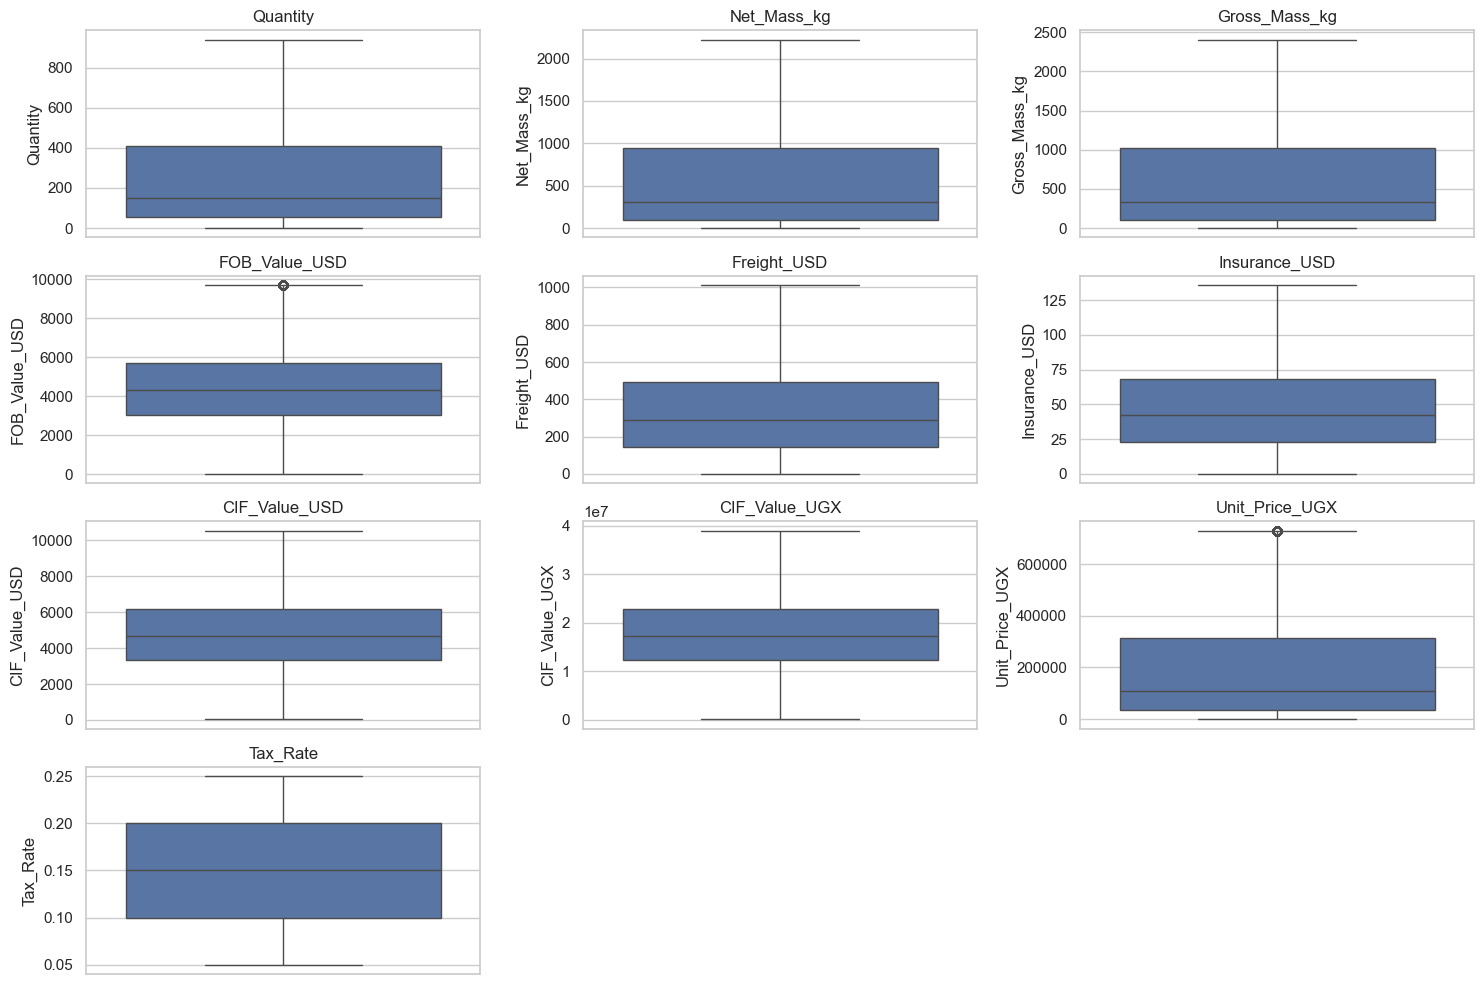

In [21]:

plt.figure(figsize=(15, 10))  # Adjusting figure size as needed
num_cols = len(data.select_dtypes(include=['float64']).columns)
# Calculate the number of rows and columns for subplots
num_rows = (num_cols + 2) // 3  # Ensure enough rows to accommodate all columns

for i, col in enumerate(data.select_dtypes(include=['float64']).columns):
    plt.subplot(num_rows, 3, i + 1)  # Dynamically adjust subplot grid
    sns.boxplot(y=data[col])
    plt.title(col)
    plt.tight_layout()  # Adjust spacing between subplots

plt.show()

In [22]:
# Identifying outliers in the FOB_Value_USD and Unit_Price_UGX using the IQR method
# Calculating IQR for FOB_Value_USD
Q1_fob = data['FOB_Value_USD'].quantile(0.25)
Q3_fob = data['FOB_Value_USD'].quantile(0.75)
IQR_fob = Q3_fob - Q1_fob

# Defining bounds for FOB outliers
lower_bound_fob = Q1_fob - 1.5 * IQR_fob
upper_bound_fob = Q3_fob + 1.5 * IQR_fob

# Identifying FOB outliers
outliers_fob = data[(data['FOB_Value_USD'] < lower_bound_fob) | (data['FOB_Value_USD'] > upper_bound_fob)]

# Calculating IQR for Unit_Price_UGX
Q1_price = data['Unit_Price_UGX'].quantile(0.25)
Q3_price = data['Unit_Price_UGX'].quantile(0.75)
IQR_price = Q3_price - Q1_price

# Defining bounds for Unit Price outliers
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# Identifying Unit Price outliers
outliers_price = data[(data['Unit_Price_UGX'] < lower_bound_price) | (data['Unit_Price_UGX'] > upper_bound_price)]

# Displaying the number of outliers detected for both columns
num_outliers_fob = outliers_fob.shape[0]
num_outliers_price = outliers_price.shape[0]

num_outliers_fob, num_outliers_price

(425, 8953)

In [23]:
# Trimming the outliers from the dataset for FOB_Value_USD and Unit_Price_UGX
# Removing outliers based on the previously calculated bounds
cleaned_data = data[(data['FOB_Value_USD'] >= lower_bound_fob) & (data['FOB_Value_USD'] <= upper_bound_fob) & 
                 (data['Unit_Price_UGX'] >= lower_bound_price) & (data['Unit_Price_UGX'] <= upper_bound_price)]

# Displaying the shape of the original and cleaned dataframes
original_shape = data.shape
cleaned_shape = cleaned_data.shape

original_shape, cleaned_shape

((80000, 19), (70734, 19))

In [24]:
# Saving the cleaned dataframe to a new CSV file for future use
cleaned_data.to_csv('cleaned_uganda_imports_trade_train_data_cleaned.csv', index=False)

CORRELATION ANALYSIS

In [25]:
# Reading the dataset again to ensure we have the correct variable
cleaned_data = pd.read_csv('cleaned_uganda_imports_trade_train_data_cleaned.csv')

In [26]:
# Checking the data types and the first few rows of the cleaned dataset to identify non-numeric columns
cleaned_data.head()

,HS_Code,Item_Description,Country_of_Origin,Port_of_Shipment,Quantity,Quantity_Unit,Net_Mass_kg,Gross_Mass_kg,FOB_Value_USD,Freight_USD,Insurance_USD,CIF_Value_USD,CIF_Value_UGX,Unit_Price_UGX,Tax_Rate,Currency_Code,Mode_of_Transport,Year,Month
0,30049099,Generic pharmaceutical products,China,Port Bell,482.42,kg,2220.29375,2403.42875,2352.84,220.04,47.01,2619.89,9671924.57,20048.76,0.18,USD,Water,2021,11
1,30049099,Generic pharmaceutical products,China,Entebbe Airport,131.97,liters,348.67000,377.42000,2084.10,169.47,17.04,2270.61,8412978.38,63749.17,0.18,USD,Air,2022,11
2,15079090,Vegetable fats and oils,Germany,Entebbe Airport,113.44,pairs,449.93000,487.04000,2759.84,151.30,53.46,2964.60,10672562.76,94081.12,0.15,USD,Air,2022,3
3,10063010,Milled rice,India,Busia,230.52,units,808.09000,874.73000,2917.65,214.86,40.36,3172.87,11692581.49,50722.63,0.10,USD,Land,2023,4
4,84089010,Industrial machinery parts,Saudi Arabia,Entebbe Airport,341.70,boxes,896.63000,970.58000,6971.39,366.85,132.64,7470.88,26519078.57,77609.24,0.25,USD,Air,2021,6


In [27]:
cleaned_data.dtypes

HS_Code                int64
Item_Description      object
Country_of_Origin     object
Port_of_Shipment      object
Quantity             float64
Quantity_Unit         object
Net_Mass_kg          float64
Gross_Mass_kg        float64
FOB_Value_USD        float64
Freight_USD          float64
Insurance_USD        float64
CIF_Value_USD        float64
CIF_Value_UGX        float64
Unit_Price_UGX       float64
Tax_Rate             float64
Currency_Code         object
Mode_of_Transport     object
Year                   int64
Month                  int64
dtype: object

In [28]:
# Compute correlation matrix using only numeric columns
correlation_matrix = cleaned_data.select_dtypes(include='number').corr()

# Display correlation matrix
correlation_matrix

,HS_Code,Quantity,Net_Mass_kg,Gross_Mass_kg,FOB_Value_USD,Freight_USD,Insurance_USD,CIF_Value_USD,CIF_Value_UGX,Unit_Price_UGX,Tax_Rate,Year,Month
HS_Code,1.000000,-0.002111,-0.002871,-0.002871,-0.004085,-0.004699,-0.004427,-0.004366,-0.004500,-0.000094,0.008795,-0.003846,0.000195
Quantity,-0.002111,1.000000,0.861850,0.861850,0.053990,0.036497,0.033986,0.054348,0.054082,-0.627165,0.000083,0.001928,-0.009082
Net_Mass_kg,-0.002871,0.861850,1.000000,1.000000,0.048925,0.032686,0.032827,0.049228,0.048919,-0.571215,-0.000457,0.002409,-0.007864
Gross_Mass_kg,-0.002871,0.861850,1.000000,1.000000,0.048925,0.032686,0.032827,0.049228,0.048919,-0.571214,-0.000457,0.002409,-0.007864
FOB_Value_USD,-0.004085,0.053990,0.048925,0.048925,1.000000,0.581013,0.635120,0.995164,0.992099,0.213484,-0.000672,0.004795,-0.002879
Freight_USD,-0.004699,0.036497,0.032686,0.032686,0.581013,1.000000,0.374177,0.657348,0.655187,0.135616,-0.002124,0.002265,-0.001964
Insurance_USD,-0.004427,0.033986,0.032827,0.032827,0.635120,0.374177,1.000000,0.641950,0.639712,0.139986,0.002971,0.005020,-0.006267
CIF_Value_USD,-0.004366,0.054348,0.049228,0.049228,0.995164,0.657348,0.641950,1.000000,0.996895,0.213816,-0.000831,0.004756,-0.002971
CIF_Value_UGX,-0.004500,0.054082,0.048919,0.048919,0.992099,0.655187,0.639712,0.996895,1.000000,0.214529,-0.000773,0.004564,-0.002563
Unit_Price_UGX,-0.000094,-0.627165,-0.571215,-0.571214,0.213484,0.135616,0.139986,0.213816,0.214529,1.000000,0.001462,-0.003816,0.003281


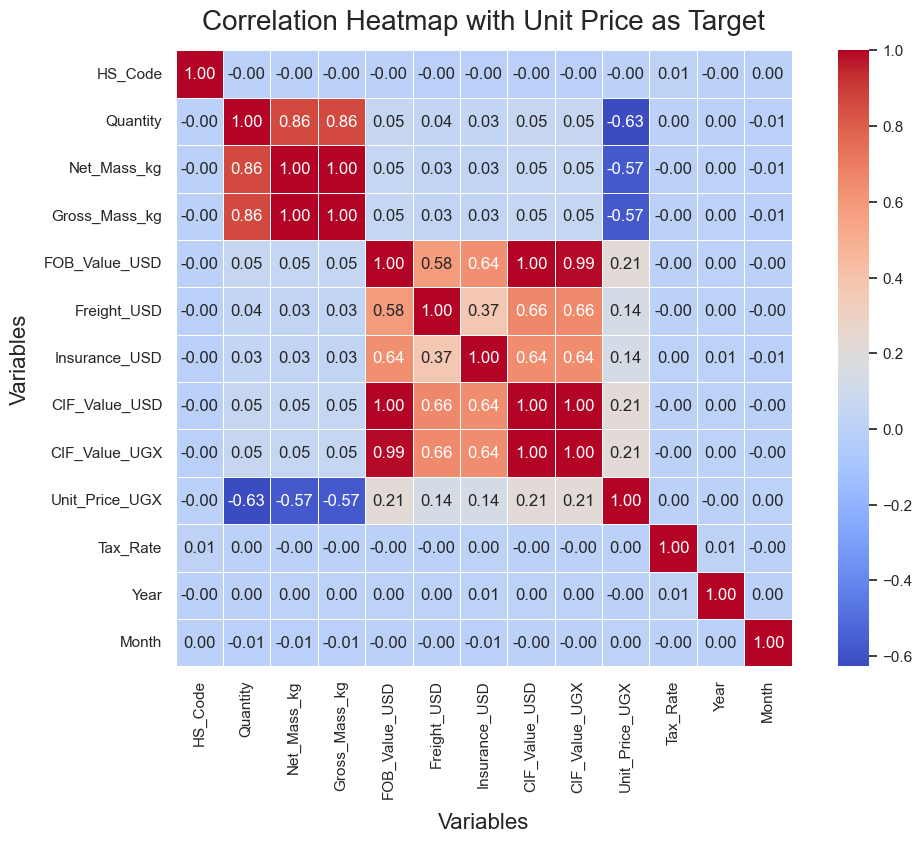

In [29]:
# correlation heatmap with unit price as target variable
# Creating a heatmap with 'Unit_Price_UGX' as the target variable
# First, we will include 'Unit_Price_UGX' in the correlation analysis
# Adding 'Unit_Price_UGX' to the numeric dataset
numeric_data_with_target = cleaned_data.select_dtypes(include=['number']).copy()

# Calculating the correlation matrix including 'Unit_Price_UGX'
correlation_matrix_with_target = numeric_data_with_target.corr()

# Setting the style for the heatmap
plt.figure(figsize=(12, 8))
sns.set_theme(style='whitegrid')

# Creating a heatmap for the correlation matrix with target variable
heatmap_target = sns.heatmap(correlation_matrix_with_target, annot=True, fmt='.2f', cmap='coolwarm',
                              cbar=True, square=True, linewidths=.5)

# Adding titles and labels
plt.title('Correlation Heatmap with Unit Price as Target', fontsize=20, pad=15)
plt.xlabel('Variables', fontsize=16, labelpad=10)
plt.ylabel('Variables', fontsize=16, labelpad=10)

# Displaying the heatmap
plt.show()

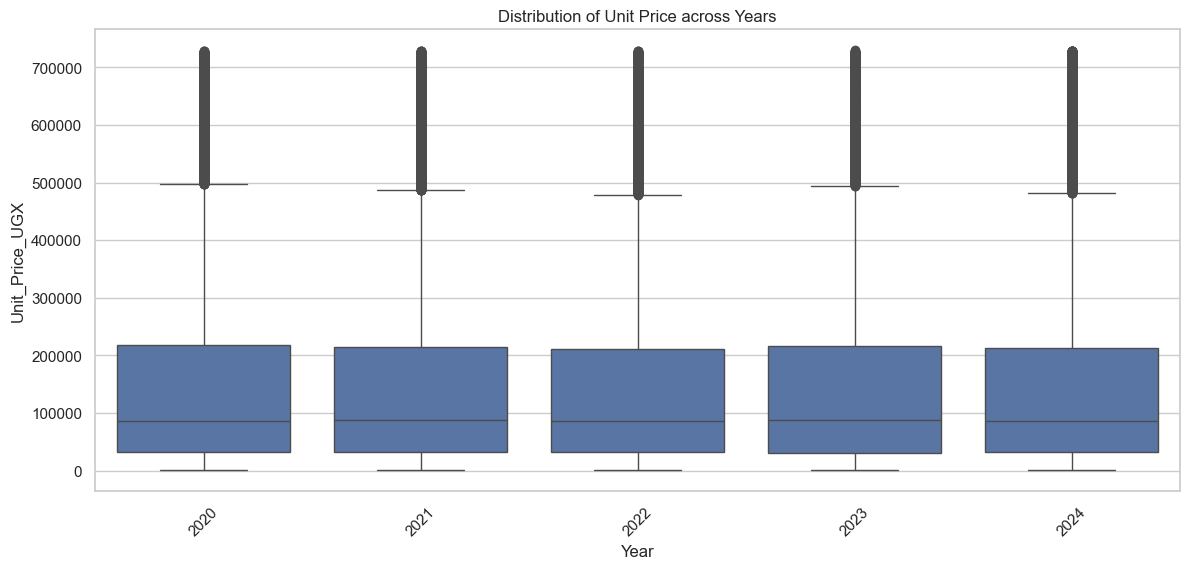

In [30]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=cleaned_data, x='Year', y='Unit_Price_UGX')  # Replace 'Year' with any categorical variable
plt.title('Distribution of Unit Price across Years')
plt.xticks(rotation=45)
plt.show()


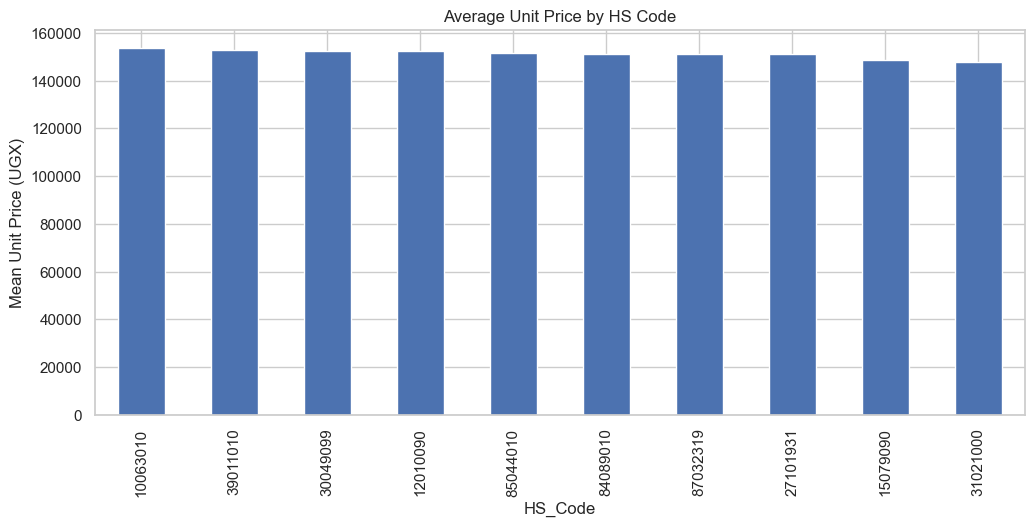

In [31]:
# Example with HS_Code
mean_price_by_hs = cleaned_data.groupby('HS_Code')['Unit_Price_UGX'].mean().sort_values(ascending=False)

# Plotting
mean_price_by_hs.head(20).plot(kind='bar', figsize=(12, 5), title="Average Unit Price by HS Code")
plt.ylabel("Mean Unit Price (UGX)")
plt.show()


In [32]:
from sklearn.feature_selection import f_classif

# Example with one-hot encoded categories
categorical_cols = ['HS_Code', 'Year', 'Month']  # Add more categorical fields as needed

# If not already encoded, one-hot encode them
df_encoded = pd.get_dummies(cleaned_data[categorical_cols], drop_first=True)

# Calculate ANOVA F-statistic between each categorical column and the target
from sklearn.feature_selection import f_regression
f_values, p_values = f_regression(df_encoded, cleaned_data['Unit_Price_UGX'])

# Present results in a readable format
anova_results = pd.DataFrame({
    'Feature': df_encoded.columns,
    'F_value': f_values,
    'P_value': p_values
}).sort_values(by='F_value', ascending=False)

anova_results.head(10)


,Feature,F_value,P_value
1,Year,1.030036,0.310154
2,Month,0.761403,0.382893
0,HS_Code,0.000632,0.979950


## FEATURE ENGINEERING

In [33]:
cleaned_data.columns

Index(['HS_Code', 'Item_Description', 'Country_of_Origin', 'Port_of_Shipment',
       'Quantity', 'Quantity_Unit', 'Net_Mass_kg', 'Gross_Mass_kg',
       'FOB_Value_USD', 'Freight_USD', 'Insurance_USD', 'CIF_Value_USD',
       'CIF_Value_UGX', 'Unit_Price_UGX', 'Tax_Rate', 'Currency_Code',
       'Mode_of_Transport', 'Year', 'Month'],
      dtype='object')

In [34]:
cleaned_data.dtypes

HS_Code                int64
Item_Description      object
Country_of_Origin     object
Port_of_Shipment      object
Quantity             float64
Quantity_Unit         object
Net_Mass_kg          float64
Gross_Mass_kg        float64
FOB_Value_USD        float64
Freight_USD          float64
Insurance_USD        float64
CIF_Value_USD        float64
CIF_Value_UGX        float64
Unit_Price_UGX       float64
Tax_Rate             float64
Currency_Code         object
Mode_of_Transport     object
Year                   int64
Month                  int64
dtype: object

CATEGORICAL ENCODING

In [35]:
# Optional: limit cardinality by selecting top N frequent categories for high-cardinality columns
top_items = cleaned_data['Item_Description'].value_counts().nlargest(20).index
cleaned_data['Item_Description'] = cleaned_data['Item_Description'].where(cleaned_data['Item_Description'].isin(top_items), 'Other')

# One-hot encoding
categorical_cols = [
    'Item_Description', 'Country_of_Origin', 'Port_of_Shipment',
    'Quantity_Unit', 'Currency_Code', 'Mode_of_Transport'
]

data_encoded = pd.get_dummies(cleaned_data, columns=categorical_cols, drop_first=True)


✅ Feature Interaction

In [36]:
# Price per kg (if applicable)
data_encoded['Price_per_kg'] = data_encoded['Unit_Price_UGX'] / (data_encoded['Net_Mass_kg'] + 1)

# Freight Ratio: cost of freight to total FOB
data_encoded['Freight_to_FOB'] = data_encoded['Freight_USD'] / (data_encoded['FOB_Value_USD'] + 1)

# CIF Ratios
data_encoded['CIF_USD_per_kg'] = data_encoded['CIF_Value_USD'] / (data_encoded['Net_Mass_kg'] + 1)

# Month as season
data_encoded['Is_Holiday_Season'] = data_encoded['Month'].apply(lambda x: 1 if x in [11, 12] else 0)


✅ Feature Scaling

In [37]:
from sklearn.preprocessing import StandardScaler

numeric_cols = [
    'Quantity', 'Net_Mass_kg', 'Gross_Mass_kg', 'FOB_Value_USD',
    'Freight_USD', 'Insurance_USD', 'CIF_Value_USD', 'CIF_Value_UGX', 'Tax_Rate'
]

scaler = StandardScaler()
data_encoded[numeric_cols] = scaler.fit_transform(data_encoded[numeric_cols])


✅ Feature Selection

In [38]:
data_encoded.head()

,HS_Code,Quantity,Net_Mass_kg,Gross_Mass_kg,FOB_Value_USD,Freight_USD,Insurance_USD,CIF_Value_USD,CIF_Value_UGX,Unit_Price_UGX,...,Quantity_Unit_kg,Quantity_Unit_liters,Quantity_Unit_pairs,Quantity_Unit_units,Mode_of_Transport_Land,Mode_of_Transport_Water,Price_per_kg,Freight_to_FOB,CIF_USD_per_kg,Is_Holiday_Season
0,30049099,0.540581,2.002695,2.002703,-1.063899,-0.466134,-0.002348,-1.029607,-1.030061,20048.76,...,True,False,False,False,False,True,9.025713,0.093481,1.179443,1
1,30049099,-0.601286,-0.505554,-0.505562,-1.210216,-0.679496,-0.969262,-1.203690,-1.199376,63749.17,...,False,True,False,False,False,False,182.312380,0.081277,6.493580,1
2,15079090,-0.661662,-0.369851,-0.369849,-0.842307,-0.756157,0.205747,-0.857803,-0.895486,94081.12,...,False,False,True,False,False,False,208.637970,0.054802,6.574413,0
3,10063010,-0.280182,0.110136,0.110124,-0.756386,-0.487989,-0.216895,-0.754001,-0.758305,50722.63,...,False,False,False,True,True,False,62.690961,0.073616,3.921529,0
4,84089010,0.082075,0.228792,0.228790,1.450690,0.153277,2.760310,1.388140,1.235699,77609.24,...,False,False,False,False,False,False,86.460167,0.052615,8.322895,0


In [39]:
data_encoded = data_encoded.astype({col: 'int' for col in data_encoded.select_dtypes('bool').columns})

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame for VIF analysis (excluding target)
X_vif = data_encoded.drop(columns=['Unit_Price_UGX'])
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]
vif_data.sort_values(by='VIF', ascending=False)


,feature,VIF
0,HS_Code,inf
12,Item_Description_Industrial machinery parts,inf
38,Mode_of_Transport_Land,inf
39,Mode_of_Transport_Water,inf
20,Item_Description_Vegetable fats and oils,inf
19,Item_Description_Used passenger vehicles,inf
18,Item_Description_Urea fertilizers,inf
17,Item_Description_Soybeans,inf
16,Item_Description_Power supply equipment,inf
15,Item_Description_Polyethylene plastics,inf


In [ ]:
from sklearn.ensemble import RandomForestRegressor

X = data_encoded.drop(columns=['Unit_Price_UGX'])
y = data_encoded['Unit_Price_UGX']

rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

# Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(15).plot(kind='barh', figsize=(8,6))


In [ ]:
# These are the selected features based on importance
selected_features = [
    'Price_per_kg',
    'Quantity',
    'CIF_Value_UGX',
    'CIF_Value_USD',
    'FOB_Value_USD',
    'Freight_USD',
    'Insurance_USD',
    'Freight_to_FOB',
    'Net_Mass_kg',
    'HS_Code',
    'Tax_Rate',
    'Month',
]

# Define the target variable
target_variable = 'Unit_Price_UGX'


In [ ]:
# Feature matrix and target
X = data_encoded[selected_features]
y = data_encoded[target_variable]

In [ ]:
# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_scaled, y)

RandomForestRegressor(random_state=42)

### LOADING THE TEST DATASET

In [ ]:
test_data = pd.read_csv('uganda_imports_trade_data_test_set.csv')

In [ ]:
test_data.head()

,Date,HS_Code,Item_Description,Country_of_Origin,Port_of_Shipment,Quantity,Quantity_Unit,Net_Mass_kg,Gross_Mass_kg,FOB_Value_USD,Freight_USD,Insurance_USD,CIF_Value_USD,CIF_Value_UGX,Unit_Price_UGX,Tax_Rate,Currency_Code,Mode_of_Transport,Predicted_Unit_Price
0,09/11/2021,30049099,Generic pharmaceutical products,Kenya,Port Bell,1291.50,crates,1626.12,1760.23,4734.34,635.24,56.29,5425.87,19388048.51,15012.04,0.15,USD,Water,NaN
1,14/09/2020,31021000,Urea fertilizers,South Africa,Busia,73.68,units,130.58,141.35,3999.33,440.76,8.25,4448.34,17341406.99,235361.12,0.15,USD,Land,NaN
2,09/02/2020,15079090,Vegetable fats and oils,Saudi Arabia,Port Bell,38.22,crates,107.79,116.68,3111.40,364.70,16.81,3492.91,13244601.93,346535.90,0.20,USD,Water,NaN
3,29/03/2024,85044010,Power supply equipment,Japan,Port Bell,108.77,units,101.09,109.43,2486.57,136.83,12.88,2636.28,9464500.04,87013.88,0.18,USD,Water,NaN
4,11/06/2020,87032319,Used passenger vehicles,Tanzania,Entebbe Airport,8.14,kg,7.39,8.00,7168.81,537.90,38.84,7745.55,27442025.27,3371256.18,0.25,USD,Air,NaN


In [ ]:
# drop Predicted_Unit_Price_UGX column
test_data.drop(columns=['Predicted_Unit_Price'], inplace=True)

In [ ]:
#check for missing values in the test dataset
test_data.isnull().sum()

Date                 0
HS_Code              0
Item_Description     0
Country_of_Origin    0
Port_of_Shipment     0
Quantity             0
Quantity_Unit        0
Net_Mass_kg          0
Gross_Mass_kg        0
FOB_Value_USD        0
Freight_USD          0
Insurance_USD        0
CIF_Value_USD        0
CIF_Value_UGX        0
Unit_Price_UGX       0
Tax_Rate             0
Currency_Code        0
Mode_of_Transport    0
dtype: int64

In [ ]:
#check for duplicate values in the test dataset
test_data.duplicated().sum()

0

CHECKING FOR OUTLIERS IN THE TEST DATASET

In [ ]:
# Detect outliers using the IQR method for all numeric columns
numeric_columns = test_data.select_dtypes(include=['float64']).columns

outliers_summary = {}

for column in numeric_columns:
    Q1 = test_data[column].quantile(0.25)  # 25th percentile
    Q3 = test_data[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range

    # Calculate bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = test_data[(test_data[column] < lower_bound) | (test_data[column] > upper_bound)]

    # Save summary of outliers
    outliers_summary[column] = {
        "num_outliers": len(outliers),
        "lower_bound": lower_bound,
        "upper_bound": upper_bound
    }

    print(f"{column}: {len(outliers)} outliers detected.")
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}\n")

# Optional: Display the full summary of outliers for analysis
print("\nOutliers Summary:")
print(pd.DataFrame(outliers_summary).T)

Quantity: 2243 outliers detected.
Lower Bound: -466.22499999999997, Upper Bound: 918.815

Net_Mass_kg: 2302 outliers detected.
Lower Bound: -1167.73625, Upper Bound: 2204.79375

Gross_Mass_kg: 2302 outliers detected.
Lower Bound: -1264.035, Upper Bound: 2386.625

FOB_Value_USD: 90 outliers detected.
Lower Bound: -951.4449999999997, Upper Bound: 9659.695

Freight_USD: 345 outliers detected.
Lower Bound: -367.67124999999993, Upper Bound: 1006.4587499999999

Insurance_USD: 348 outliers detected.
Lower Bound: -44.185, Upper Bound: 134.735

CIF_Value_USD: 110 outliers detected.
Lower Bound: -1016.5650000000005, Upper Bound: 10502.775000000001

CIF_Value_UGX: 117 outliers detected.
Lower Bound: -3842171.022499999, Upper Bound: 38886021.2375

Unit_Price_UGX: 0 outliers detected.
Lower Bound: -383842.11249999993, Upper Bound: 741148.5074999998

Tax_Rate: 0 outliers detected.
Lower Bound: -0.05000000000000002, Upper Bound: 0.35000000000000003


Outliers Summary:
                num_outliers   l

In [ ]:
# Function to trim outliers using IQR bounds
def trim_outliers(test_data, column, lower_bound, upper_bound):
    test_data[column] = test_data[column].clip(lower=lower_bound, upper=upper_bound)

outlier_bounds = {
    'Quantity': (-466.2250, 918.8150),
    'Net_Mass_kg': (-1167.736, 2204.794),
    'Gross_Mass_kg': (-1264.035, 2386.625),
    'FOB_Value_USD': (-951.445, 9659.695),
    'Freight_USD': (-367.6712, 1006.459),
    'Insurance_USD': (-44.185, 134.735),
    'CIF_Value_USD': (-1016.565, 10502.78),
    'CIF_Value_UGX': (-3842171.0, 38886020.0),
    'Unit_Price_UGX': (-383842.1, 741148.5),
    'Tax_Rate': (-0.05, 0.35)
}


# Apply trimming
for column, (lower_bound, upper_bound) in outlier_bounds.items():
    trim_outliers(test_data, column, lower_bound, upper_bound)

# Confirm trimming
print("✅ Outlier trimming complete. Summary of adjusted columns:")
print(test_data[list(outlier_bounds.keys())].describe())


✅ Outlier trimming complete. Summary of adjusted columns:
           Quantity   Net_Mass_kg  Gross_Mass_kg  FOB_Value_USD   Freight_USD  \
count  20000.000000  20000.000000   20000.000000   20000.000000  20000.000000   
mean     278.256979    642.514943     695.505033    4425.698625    343.198318   
std      299.347572    730.637208     790.894022    1882.785727    242.697016   
min        0.450000      0.440000       0.470000      48.870000      1.520000   
25%       53.165000     96.962500     104.962500    3027.732500    147.627500   
50%      146.280000    307.275000     332.615000    4300.360000    295.480000   
75%      399.425000    940.095000    1017.627500    5680.517500    491.160000   
max      918.815000   2204.794000    2386.625000    9659.695000   1006.459000   

       Insurance_USD  CIF_Value_USD  CIF_Value_UGX  Unit_Price_UGX  \
count   20000.000000   20000.000000   2.000000e+04    20000.000000   
mean       48.553808    4819.032238   1.783030e+07   218452.188763   
st

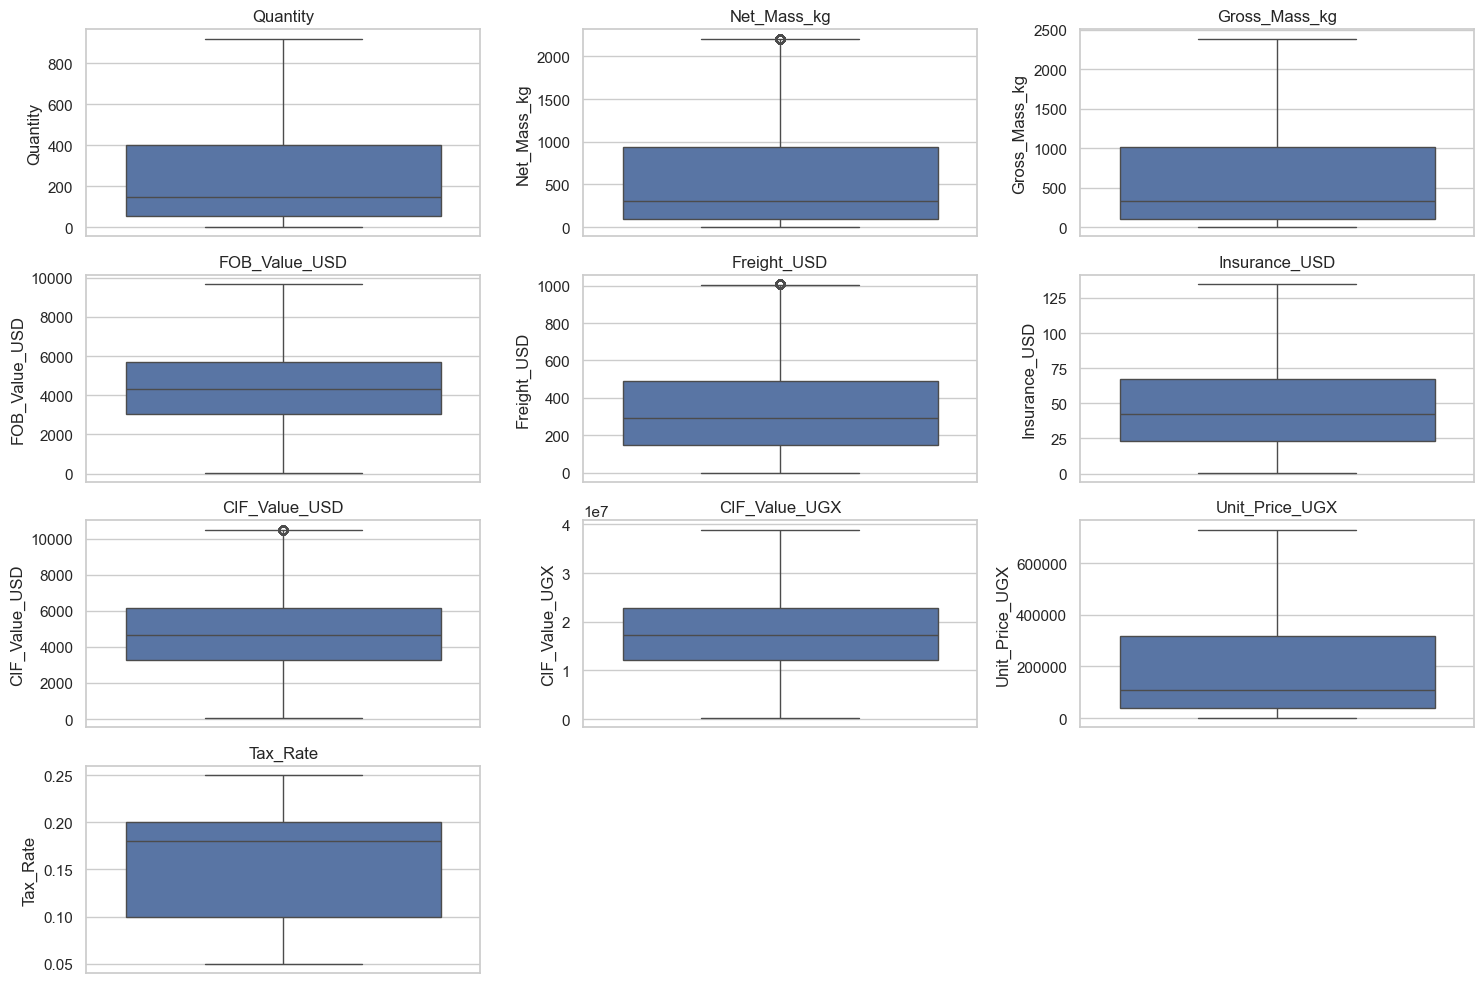

In [ ]:

plt.figure(figsize=(15, 10))  # Adjusting figure size as needed
num_cols = len(test_data.select_dtypes(include=['float64']).columns)
# Calculate the number of rows and columns for subplots
num_rows = (num_cols + 2) // 3  # Ensure enough rows to accommodate all columns

for i, col in enumerate(test_data.select_dtypes(include=['float64']).columns):
    plt.subplot(num_rows, 3, i + 1)  # Dynamically adjust subplot grid
    sns.boxplot(y=test_data[col])
    plt.title(col)
    plt.tight_layout()  # Adjust spacing between subplots

plt.show()

In [ ]:
test_data.columns

Index(['Date', 'HS_Code', 'Item_Description', 'Country_of_Origin',
       'Port_of_Shipment', 'Quantity', 'Quantity_Unit', 'Net_Mass_kg',
       'Gross_Mass_kg', 'FOB_Value_USD', 'Freight_USD', 'Insurance_USD',
       'CIF_Value_USD', 'CIF_Value_UGX', 'Unit_Price_UGX', 'Tax_Rate',
       'Currency_Code', 'Mode_of_Transport'],
      dtype='object')

In [ ]:
# Define updated outlier bounds from earlier summary
outlier_bounds = {
    'FOB_Value_USD': (-951.445, 9659.695),
    'Unit_Price_UGX': (-383842.1, 741148.5),
    'CIF_Value_USD': (-1016.565, 10502.78),
    'Net_Mass_kg': (-1167.736, 2204.794),
    'Freight_USD': (-367.6712, 1006.459),
}

# Function to detect outliers based on the bounds dictionary
def detect_outliers(df, column, lower, upper):
    return df[(df[column] < lower) | (df[column] > upper)]

# Apply the function to each specified column
outliers_fob = detect_outliers(data, 'FOB_Value_USD', *outlier_bounds['FOB_Value_USD'])
outliers_price = detect_outliers(data, 'Unit_Price_UGX', *outlier_bounds['Unit_Price_UGX'])
outliers_cif = detect_outliers(data, 'CIF_Value_USD', *outlier_bounds['CIF_Value_USD'])
outliers_net_mass = detect_outliers(data, 'Net_Mass_kg', *outlier_bounds['Net_Mass_kg'])
outliers_freight = detect_outliers(data, 'Freight_USD', *outlier_bounds['Freight_USD'])

# Combine all outlier indices (optional if you want to drop or analyze together)
all_outlier_indices = pd.concat([
    outliers_fob, outliers_price, outliers_cif,
    outliers_net_mass, outliers_freight
]).index.unique()

# Output the number of outliers for each
print("Outliers Count:")
print(f"FOB_Value_USD: {outliers_fob.shape[0]}")
print(f"Unit_Price_UGX: {outliers_price.shape[0]}")
print(f"CIF_Value_USD: {outliers_cif.shape[0]}")
print(f"Net_Mass_kg: {outliers_net_mass.shape[0]}")
print(f"Freight_USD: {outliers_freight.shape[0]}")

# Optional: Drop outliers from original data
# data_cleaned = data.drop(index=all_outlier_indices)


Outliers Count:
FOB_Value_USD: 438
Unit_Price_UGX: 0
CIF_Value_USD: 477
Net_Mass_kg: 9276
Freight_USD: 1278
